In [ ]:
%load_ext autoreload
%autoreload 2

from fibsem import utils
from fibsem.structures import MicroscopeSettings, SystemSettings
from pprint import pprint

In [ ]:
microscope, settings = utils.setup_session(protocol_path="../example/protocol_slice_and_view.yaml")

In [ ]:
pprint(settings)

In [ ]:
path = settings.image.save_path
import zarr
from pathlib import Path
import os
from autoscript_sdb_microscope_client.structures import AdornedImage

def create_zarr_from_image(img: AdornedImage, path: Path, name: str) -> zarr.Array:

    return zarr.open(os.path.join(path, f"{name}.zarr"), mode='w', shape=img.data.shape)

In [18]:
import numpy as np
from PIL import Image    
import matplotlib.pyplot as plt


In [19]:


arr = np.random.random((500, 500))

save_profile_to_bmp(arr)

0 255


In [20]:
img = Image.open("profile.bmp")

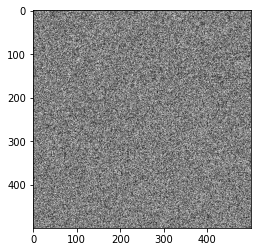

In [21]:
plt.imshow(img, cmap="gray")
plt.show()